Converged after 3 iterations.


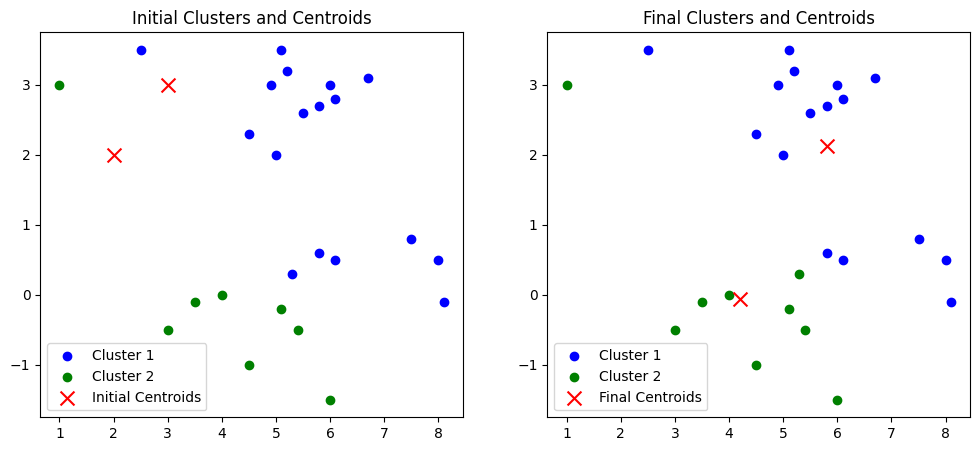

Final centroids:
 [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data points (X) and centroids
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3], [6.1, 2.8], 
    [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],[8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], 
    [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],[4.0, 0.0],
    [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])
centroids = initial_centroids.copy()
k = centroids.shape[0]
max_iterations = 100
tolerance = 1e-4

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = centroids[i]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def has_converged(old_centroids, centroids, tolerance):
    return np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance)

# Store initial cluster assignments for plotting
initial_clusters = assign_clusters(X, centroids)

# KMeans Algorithm
for iteration in range(max_iterations):
    # Step 1: Assignment Step
    clusters = assign_clusters(X, centroids)
    
    # Step 2: Update Step
    new_centroids = update_centroids(X, clusters, k)
    
    # Step 3: Convergence Check
    if has_converged(centroids, new_centroids, tolerance):
        print(f"Converged after {iteration + 1} iterations.")
        break
    
    # Update centroids for the next iteration
    centroids = new_centroids

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot initial clusters
ax1.scatter(X[initial_clusters == 0, 0], X[initial_clusters == 0, 1], color='blue', label='Cluster 1')
ax1.scatter(X[initial_clusters == 1, 0], X[initial_clusters == 1, 1], color='green', label='Cluster 2')
ax1.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='red', marker='x', s=100, label='Initial Centroids')
ax1.set_title('Initial Clusters and Centroids')
ax1.legend()

# Plot final clusters
ax2.scatter(X[clusters == 0, 0], X[clusters == 0, 1], color='blue', label='Cluster 1')
ax2.scatter(X[clusters == 1, 0], X[clusters == 1, 1], color='green', label='Cluster 2')
ax2.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Final Centroids')
ax2.set_title('Final Clusters and Centroids')
ax2.legend()

plt.show()

# Print final centroid values
print("Final centroids:\n", centroids)


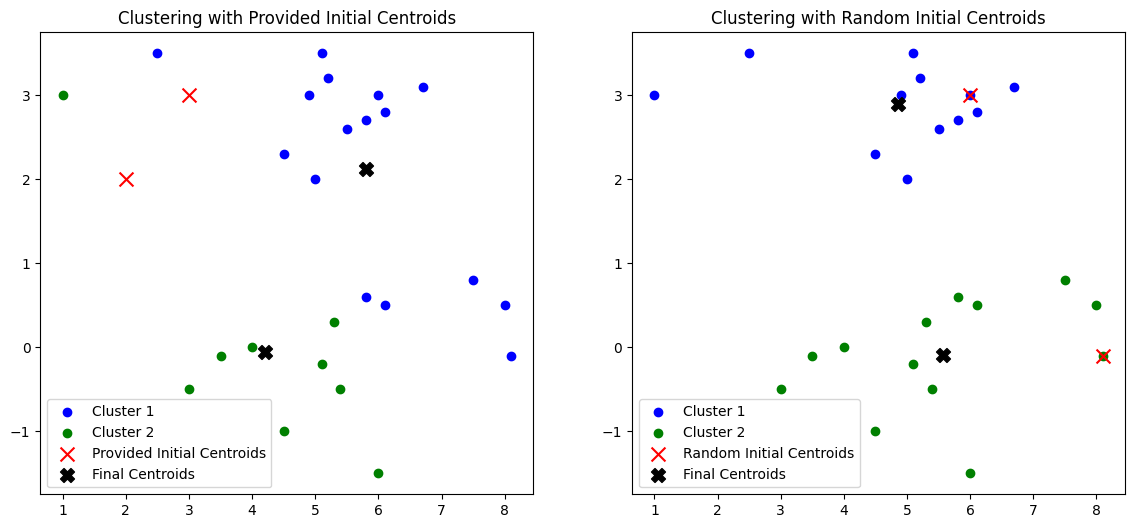

Final centroids with provided initial centroids:
 [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Final centroids with random initial centroids:
 [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], 
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], 
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Parameters
k = 2
max_iterations = 100
tolerance = 1e-4

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = centroids[i]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def has_converged(old_centroids, centroids, tolerance):
    return np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance)

# KMeans function
def kmeans(X, initial_centroids):
    centroids = initial_centroids.copy()
    for iteration in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if has_converged(centroids, new_centroids, tolerance):
            break
        centroids = new_centroids
    return centroids, clusters

# Run KMeans with provided initial centroids
provided_initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])
centroids_provided, clusters_provided = kmeans(X, provided_initial_centroids)

# Run KMeans with random initialization of centroids
random_initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids_random, clusters_random = kmeans(X, random_initial_centroids)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot with provided initial centroids
ax1.scatter(X[clusters_provided == 0, 0], X[clusters_provided == 0, 1], color='blue', label='Cluster 1')
ax1.scatter(X[clusters_provided == 1, 0], X[clusters_provided == 1, 1], color='green', label='Cluster 2')
ax1.scatter(provided_initial_centroids[:, 0], provided_initial_centroids[:, 1], color='red', marker='x', s=100, label='Provided Initial Centroids')
ax1.scatter(centroids_provided[:, 0], centroids_provided[:, 1], color='black', marker='X', s=100, label='Final Centroids')
ax1.set_title('Clustering with Provided Initial Centroids')
ax1.legend()

# Plot with random initial centroids
ax2.scatter(X[clusters_random == 0, 0], X[clusters_random == 0, 1], color='blue', label='Cluster 1')
ax2.scatter(X[clusters_random == 1, 0], X[clusters_random == 1, 1], color='green', label='Cluster 2')
ax2.scatter(random_initial_centroids[:, 0], random_initial_centroids[:, 1], color='red', marker='x', s=100, label='Random Initial Centroids')
ax2.scatter(centroids_random[:, 0], centroids_random[:, 1], color='black', marker='X', s=100, label='Final Centroids')
ax2.set_title('Clustering with Random Initial Centroids')
ax2.legend()

plt.show()

# Print final centroids for both initializations
print("Final centroids with provided initial centroids:\n", centroids_provided)
print("Final centroids with random initial centroids:\n", centroids_random)


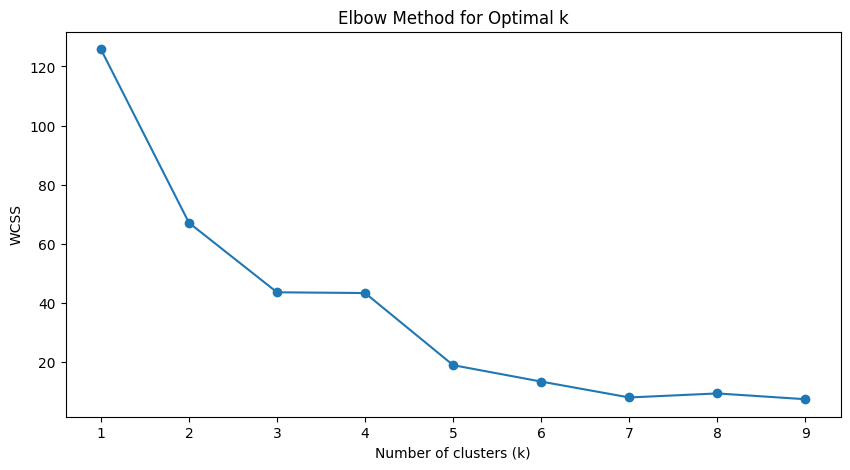

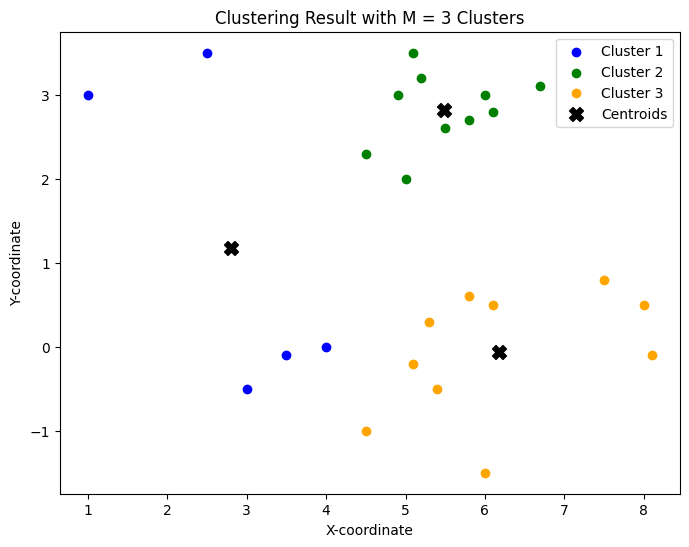

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], 
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], 
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KMeans implementation
def kmeans(X, initial_centroids, max_iterations=100, tolerance=1e-4):
    k = len(initial_centroids)
    centroids = initial_centroids.copy()
    for iteration in range(max_iterations):
        # Step 1: Assignment step
        clusters = []
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)

        # Step 2: Update step
        new_centroids = []
        for i in range(k):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)

        # Convergence check
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
            break
        centroids = new_centroids

    # Calculate WCSS
    wcss = 0
    for i in range(k):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)

    return centroids, clusters, wcss

# Elbow method: calculate WCSS for different values of k
wcss_values = []
k_values = range(1, 10)  # Trying k from 1 to 10

for k in k_values:
    # Randomly initialize centroids
    initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    _, _, wcss = kmeans(X, initial_centroids)
    wcss_values.append(wcss)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# here we choose m=3 

M = 3

# Randomly initialize M centroids for final clustering
initial_centroids = X[np.random.choice(X.shape[0], M, replace=False)]
final_centroids, final_clusters, _ = kmeans(X, initial_centroids)

# Plot the final clustering result
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange', 'purple', 'red', 'brown']
for i in range(M):
    cluster_points = X[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title(f"Clustering Result with M = {M} Clusters")
plt.legend()
plt.show()
